In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt


In [2]:
sns.set(rc={'figure.figsize':(15,12)})

In [3]:
data = pd.read_csv("../Data/data.csv")
data["date"] = data["day"].astype(str)+"-"+data["month"].astype(str)+"-"+data["year"].astype(str)
data["date"] = pd.to_datetime(data["date"],format="%d-%m-%Y")
data.head()

,producto,year,month,day,precio_min,precio_max,precio_mean,date
0,CEBOLLA CABEZA BLANCA NACIONAL,2022,4,30,1.5,1.9,1.73,2022-04-30
1,CEBOLLA CABEZA ROJA/MAJ/TAMB/LOC/CAM/MIL,2022,4,30,1.4,1.9,1.60,2022-04-30
2,CEBOLLA CHINA (CRIOLLA/SERRANA),2022,4,30,1.5,2.0,1.75,2022-04-30
3,PAPA AMARILLA,2022,4,30,1.4,1.9,1.68,2022-04-30
4,PAPA BLANCA/VALLE/OTROS,2022,4,30,1.4,1.8,1.58,2022-04-30


In [4]:
data["producto"].value_counts()

PAPA YUNGAY                                 3052
CEBOLLA CHINA (CRIOLLA/SERRANA)             3052
PAPA AMARILLA                               3052
PAPA CANCHAN                                3052
PAPA COLOR/VALLE/OTROS                      3052
PAPA HUAYRO (ROJO-MORO-NEGRO)RUNT/MARH/U    3052
CEBOLLA CABEZA BLANCA NACIONAL              3051
PAPA UNICA                                  3051
CEBOLLA CABEZA ROJA/MAJ/TAMB/LOC/CAM/MIL    3051
PAPA NEGRA ANDINA                           3050
PAPA BLANCA/VALLE/OTROS                     3050
PAPA PERUANITA (INJERTO)                    3049
PAPA HUAMANTANGA                            3029
PAPA PERRICHOLI                             2238
PAPA AMARILIS                                 88
PAPA TOMASA                                    9
PAPA CAPIRO                                    7
Name: producto, dtype: int64

In [5]:
data = data[(data.producto != "PAPA AMARILIS") & (data.producto != "PAPA CAPIRO") & (data.producto != "PAPA TOMASA") & (data.producto != "PAPA PERRICHOLI")]

<AxesSubplot:ylabel='Precio Promedio (Soles)'>

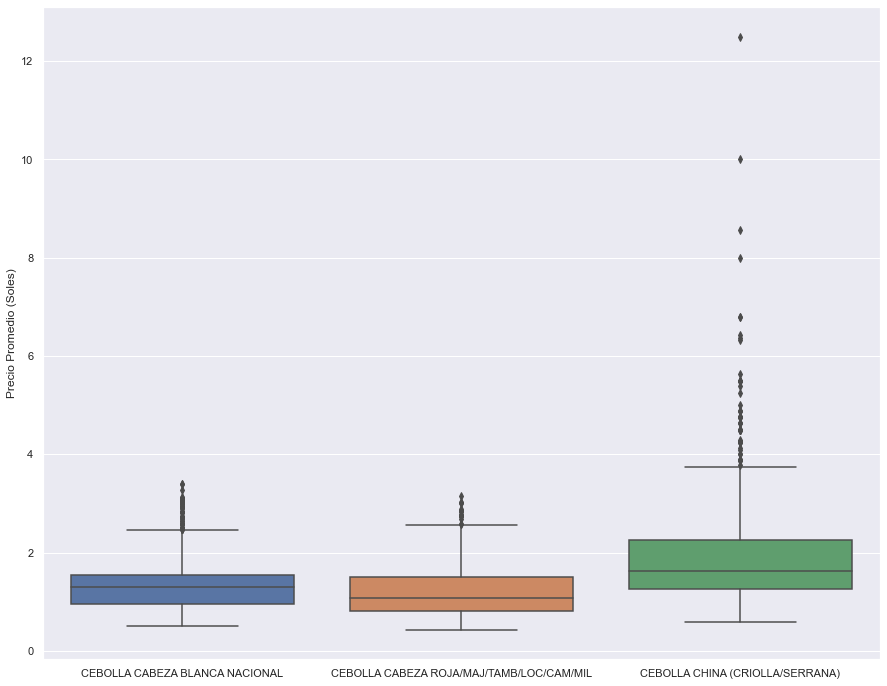

In [32]:
cebollas = data[data.producto.astype(str).str.contains("CEBOLLA")]
ax = sns.boxplot(x="producto",y="precio_mean",data=cebollas)
ax.set_xlabel("")
ax.set_ylabel("Precio Promedio (Soles)")
ax

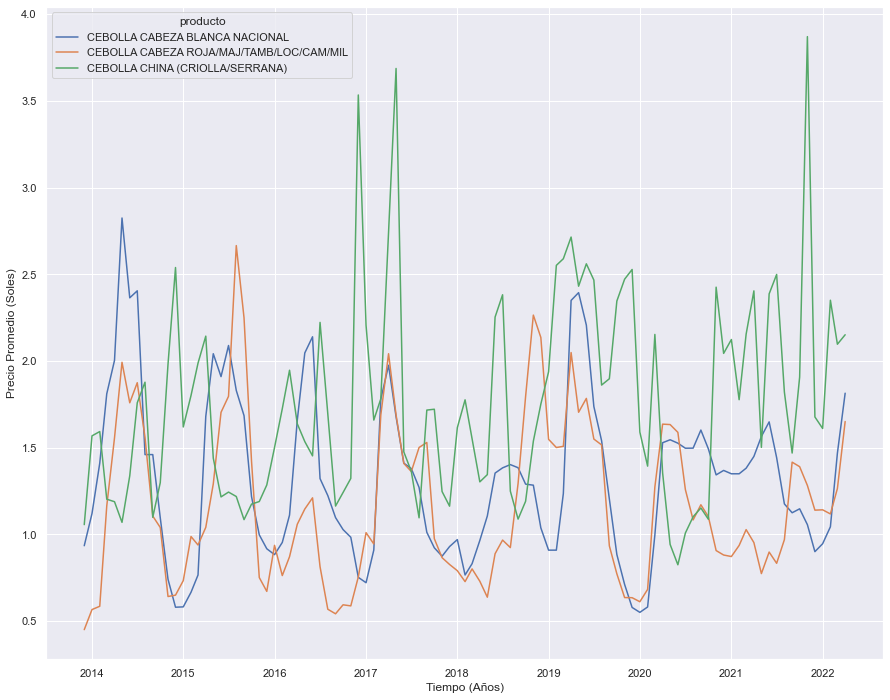

In [23]:
monthAvg = cebollas.groupby(["producto","year","month"]).agg({"precio_mean": "mean"}).reset_index()
monthAvg["date"] = monthAvg["month"].astype(str)+"-"+monthAvg["year"].astype(str)
monthAvg["date"] = pd.to_datetime(monthAvg["date"],format="%m-%Y")
monthAvg = monthAvg[monthAvg.producto.astype(str).str.contains("CEBOLLA")]
ax = sns.lineplot(data=monthAvg,x="date", y="precio_mean", hue="producto")
ax.set_xlabel("Tiempo (Años)")
ax.set_ylabel("Precio Promedio (Soles)")
fig = ax.get_figure()
fig.savefig("cebolla.png")

[Text(0, 0, 'PAPA AMARILLA'),
 Text(1, 0, 'PAPA BLANCA/VALLE/OTROS'),
 Text(2, 0, 'PAPA COLOR/VALLE/OTROS'),
 Text(3, 0, 'PAPA HUAYRO '),
 Text(4, 0, 'PAPA HUAMANTANGA'),
 Text(5, 0, 'PAPA NEGRA ANDINA'),
 Text(6, 0, 'PAPA PERUANITA '),
 Text(7, 0, 'PAPA YUNGAY'),
 Text(8, 0, 'PAPA UNICA'),
 Text(9, 0, 'PAPA CANCHAN')]

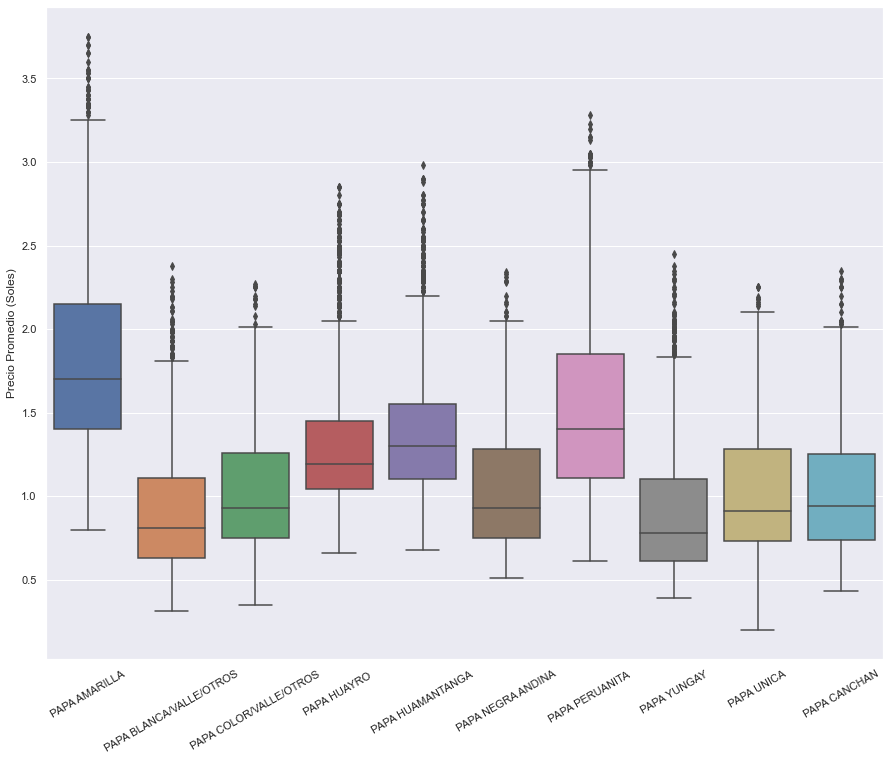

In [33]:
papas = data[data.producto.astype(str).str.contains("PAPA")]
ax = sns.boxplot(x="producto",y="precio_mean",data=papas)
ax.set_xlabel("")
ax.set_ylabel("Precio Promedio (Soles)")
ax.set_xticklabels([label.get_text().split("(")[0] for label in ax.get_xticklabels()],rotation=30)

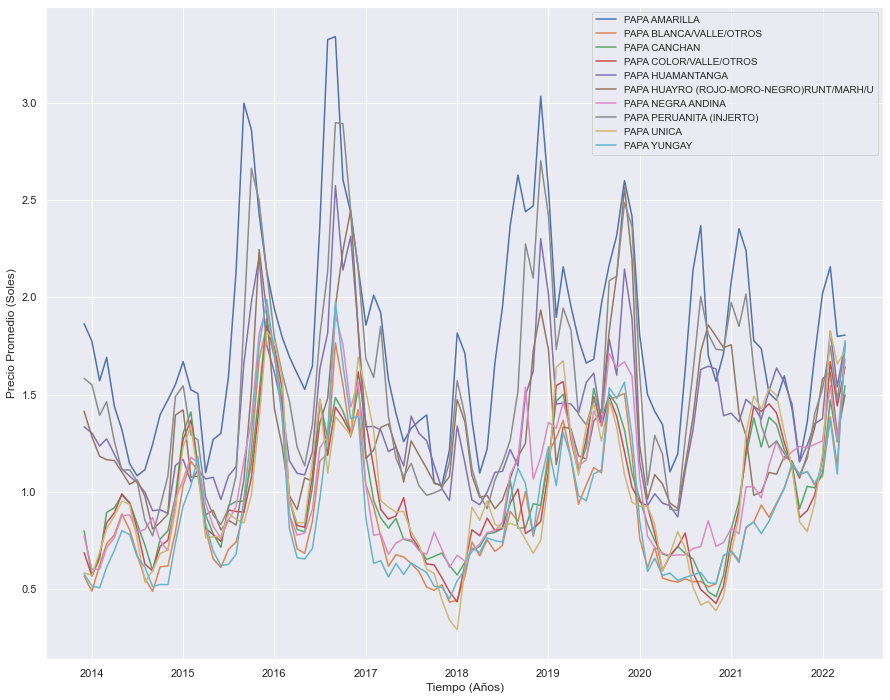

In [11]:
monthAvg = papas.groupby(["producto","year","month"]).agg({"precio_mean": "mean"}).reset_index()
monthAvg["date"] = monthAvg["month"].astype(str)+"-"+monthAvg["year"].astype(str)
monthAvg["date"] = pd.to_datetime(monthAvg["date"],format="%m-%Y")

ax = sns.lineplot(data=monthAvg,x="date", y="precio_mean", hue="producto", )
ax.set_xlabel("Tiempo (Años)")
ax.set_ylabel("Precio Promedio (Soles)")
plt.legend(fontsize="10")
fig = ax.get_figure()
fig.savefig("papas.png")

In [110]:
papas.groupby("producto").describe()["precio_mean"]

,count,mean,std,min,25%,50%,75%,max
producto,,,,,,,,
PAPA AMARILLA,3052.0,1.800111,0.548105,0.80,1.40,1.70,2.1500,3.75
PAPA BLANCA/VALLE/OTROS,3050.0,0.903390,0.351882,0.31,0.63,0.81,1.1075,2.38
PAPA CANCHAN,3052.0,1.005616,0.329483,0.43,0.74,0.94,1.2500,2.35
PAPA COLOR/VALLE/OTROS,3052.0,1.003994,0.350133,0.35,0.75,0.93,1.2600,2.27
PAPA HUAMANTANGA,3029.0,1.368013,0.376896,0.68,1.10,1.30,1.5500,2.98
PAPA HUAYRO (ROJO-MORO-NEGRO)RUNT/MARH/U,3052.0,1.304430,0.403949,0.66,1.04,1.19,1.4500,2.85
PAPA NEGRA ANDINA,3050.0,1.040511,0.356097,0.51,0.75,0.93,1.2800,2.34
PAPA PERUANITA (INJERTO),3049.0,1.518337,0.521776,0.61,1.11,1.40,1.8500,3.28
PAPA UNICA,3051.0,0.994648,0.386825,0.20,0.73,0.91,1.2800,2.25


In [111]:
cebollas.groupby("producto").describe()["precio_mean"]

,count,mean,std,min,25%,50%,75%,max
producto,,,,,,,,
CEBOLLA CABEZA BLANCA NACIONAL,3051.0,1.321731,0.490374,0.51,0.95,1.30,1.55,3.40
CEBOLLA CABEZA ROJA/MAJ/TAMB/LOC/CAM/MIL,3051.0,1.172452,0.483058,0.43,0.80,1.08,1.50,3.15
CEBOLLA CHINA (CRIOLLA/SERRANA),3052.0,1.767163,0.797024,0.58,1.25,1.63,2.25,12.50


In [117]:
cebollas[(cebollas.year == 2020) & (cebollas.month == 11) & (cebollas.producto.astype(str).str.contains("CHINA"))]

,producto,year,month,day,precio_min,precio_max,precio_mean,date
6753,CEBOLLA CHINA (CRIOLLA/SERRANA),2020,11,30,1.3,1.5,1.45,2020-11-30
6766,CEBOLLA CHINA (CRIOLLA/SERRANA),2020,11,29,1.5,1.5,1.50,2020-11-29
6779,CEBOLLA CHINA (CRIOLLA/SERRANA),2020,11,28,1.5,2.0,1.63,2020-11-28
6792,CEBOLLA CHINA (CRIOLLA/SERRANA),2020,11,27,1.0,1.5,1.25,2020-11-27
6805,CEBOLLA CHINA (CRIOLLA/SERRANA),2020,11,26,1.0,1.5,1.25,2020-11-26
6818,CEBOLLA CHINA (CRIOLLA/SERRANA),2020,11,25,1.1,1.5,1.28,2020-11-25
6831,CEBOLLA CHINA (CRIOLLA/SERRANA),2020,11,24,1.5,1.5,1.50,2020-11-24
6844,CEBOLLA CHINA (CRIOLLA/SERRANA),2020,11,23,1.1,1.5,1.28,2020-11-23
6857,CEBOLLA CHINA (CRIOLLA/SERRANA),2020,11,22,1.0,1.5,1.25,2020-11-22
6870,CEBOLLA CHINA (CRIOLLA/SERRANA),2020,11,21,1.0,1.5,1.33,2020-11-21
